# Información integrantes del equipo de trabajo

**Nombre y apellidos (Grupo):**

**Nombre y apellidos (Grupo):**

**Nombre y apellidos (Grupo):**

# Ecuación del calor:


La ecuación del calor general viene dada por la expresión:

$$\frac{\partial u}{\partial t} - \alpha\nabla^2 u=Q\, ;$$ 

donde $u$ es un campo escalar de temperaturas, $\alpha$ la constante de difusividad, y $Q$ representa las fuentes de calor, sumideros, o puntos de generación de energía (producido por reacciones químicas, resistividad eléctrica, etc).Para resolver el problema de forma numérica, podemos recurrir al método de diferencias finitas, considerando que el campo escalar 

$$ u(\vec{x},t) = u^t_{i, j, k,\dots}\, $$

Remarcar que los indices $i, j, k, \dots$ hacen referencias a cada una de las componentes del vector $\vec{x}$ una vez discretizado el espacio, por ejemplo, en 2 dimensiones: $\vec{x}=(x,y)$, de forma que un punto del espacio (después de discretizar) puede identificarse como $\vec{x}_{i,j}=(x_i,y_j)$. Para el caso bidimensional en coordenadas cartesianas, tenemos

$$\frac{u^{t+1}_{i,j}-u^{t}_{i,j}}{\Delta t}-\alpha\left[\frac{u^t_{i+1,j}-2u^t_{i,j}+u^t_{i-1,j}}{\Delta x^2}+\frac{u^t_{i,j+1}-2u^t_{i,j}+u^t_{i,j-1}}{\Delta y^2}\right]=Q^t_{i,j}$$

## Condiciones de contorno fijas:


- Resolved la ecuación del calor mediante un método iterativo, en el supuesto de un cuadrado de tamaño $L=1$, en ausencia de fuentes de calor, que en el instante inicial se encuentra a temperatura 0, y cuya frontera está a temperatura constanete $T$. Representar el campo de temperaturas para un conjunto de tiempos. Tomad $\alpha=5$.

In [67]:
# Librerías
from numpy import zeros, array, exp, linspace, meshgrid, cos, sin
from pylab import imshow, colorbar, show, xlabel, ylabel, title

Primero, despejamos el término $u^{t+1}_{i,j}$ de la ecuación previa:
$$u^{t+1}_{i,j} = u^{t}_{i,j} + \Delta t \cdot Q^t_{i,j} + \Delta t \cdot \alpha\left[\frac{u^t_{i+1,j}-2u^t_{i,j}+u^t_{i-1,j}}{\Delta x^2}+\frac{u^t_{i,j+1}-2u^t_{i,j}+u^t_{i,j-1}}{\Delta y^2}\right].$$

Además, para asegurar la estabilidad de la ecuación, se ha de cumplir la siguiente condición:
$$\Delta t \leq \frac{\Delta x^2 \Delta y^2}{2\alpha \left(\Delta x^2 + \Delta y^2 \right)},$$
pero como en nuestro caso $\Delta x = \Delta y = \Delta g$, se puede simplificar como
$$\Delta t \leq \frac{\Delta g^2}{4\alpha}.$$

Finalmente, el tamaño de la rendija ha de ser
$$\Delta g^2 \geq \sqrt{4\alpha\Delta t}.$$

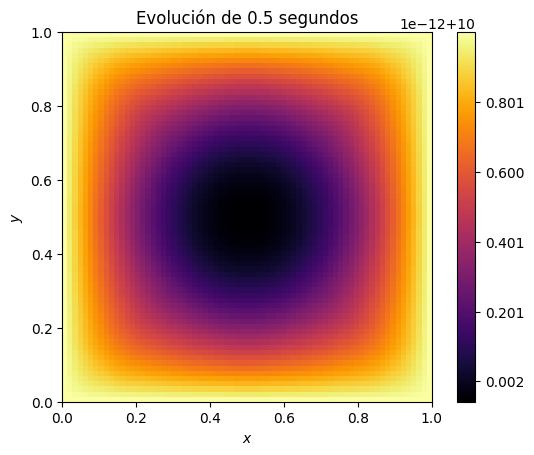

In [65]:
# Constantes
boxSize = 1
timeStep = 1e-5
diffusivity = 5
temperatureAtSides = 10

# Tamaño de la rejilla para asegurar estabilidad
gridSizeModifier = 0.01                     # aumenta el tamaño ligeramente si se desea para asegurar estabilidad en la conversión a `int`
gridSize = ( 4*diffusivity*timeStep )**0.5 + gridSizeModifier*( 4*diffusivity*timeStep )**0.5   # cálculo basado en la condición de estabilidad de la ecuación
gridResolution = int(boxSize / gridSize)    # calculamos la cantidad de puntos que implica el tamaño de la rejilla
gridSize = boxSize / gridResolution         # volvemos a calcular el tamaño de la rejilla para que se ajuste correctamente a la resolución

# Inicializamos la rejilla de valores de temperatura
temperatureGrid = zeros([gridResolution+1, gridResolution+1], float)
temperatureGrid[0, :] = temperatureAtSides              #
temperatureGrid[gridResolution, :] = temperatureAtSides # condiciones de frontera
temperatureGrid[:, 0] = temperatureAtSides              #
temperatureGrid[:, gridResolution] = temperatureAtSides #

# Loop principal
timeMax = 0.5
time = 0
while time < timeMax:
    term1 = temperatureGrid[2:gridResolution+1, 1:gridResolution] - 2*temperatureGrid[1:gridResolution, 1:gridResolution] + temperatureGrid[0:gridResolution-1, 1:gridResolution]
    term2 = temperatureGrid[1:gridResolution, 2:gridResolution+1] - 2*temperatureGrid[1:gridResolution, 1:gridResolution] + temperatureGrid[1:gridResolution, 0:gridResolution-1]
    evolutionTerm = timeStep * diffusivity * (term1 + term2) / gridSize**2
    temperatureGrid[1:gridResolution, 1:gridResolution] = temperatureGrid[1:gridResolution, 1:gridResolution] + evolutionTerm
    time += timeStep
    print(f"tiempo: {round(time,4)}/{timeMax} {' '*20}", end='\r')

# Representación
imshow(temperatureGrid, extent=[0,boxSize, 0,boxSize], cmap='inferno', origin='lower')
colorbar()
xlabel('$x$')
ylabel('$y$')
title(f'Evolución de {timeMax} segundos')
show()

## Fuente:

- Tomar ahora una fuente de calor fija

$$Q(x,y)=\frac{1}{C}\exp\left[-\left(\frac{x-0.5}{0.05}\right)^2\right]\exp\left[-\left(\frac{y-0.5}{0.05}\right)^2\right]\,$$

siendo $C$ una constante tal que $\max{Q(\theta,\phi)}=1\times 10^5$, y los bordes están a temperatura nula.

In [85]:
def heatSource(x, y, x0: float = 0.5, y0: float = 0.5):
    heatMap = 1e5 * exp(-( (x-x0)/0.05 )**2) * exp(-( (y-y0)/0.05 )**2)
    return heatMap

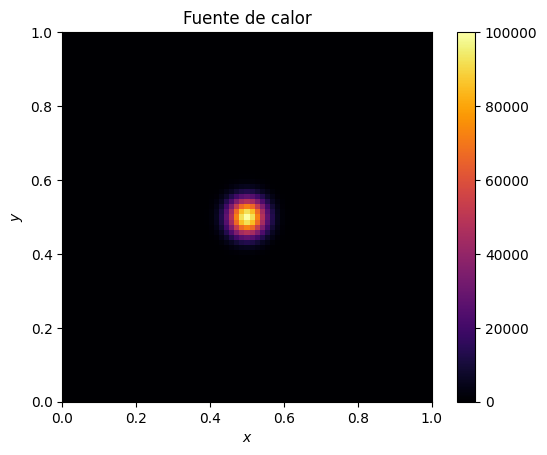

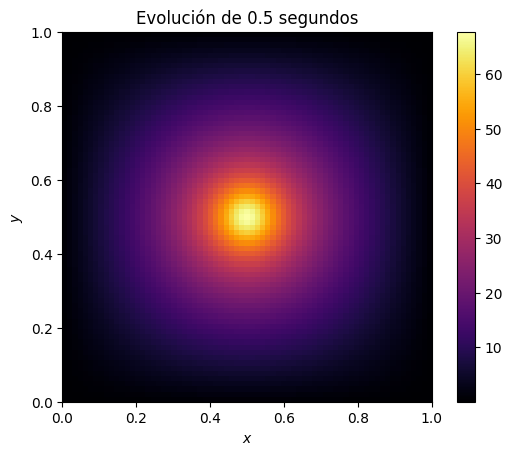

In [99]:
# Constantes
boxSize = 1
timeStep = 1e-5
diffusivity = 5
temperatureAtSides = 10

# Tamaño de la rejilla para asegurar estabilidad
gridSizeModifier = 0.01                     # aumenta el tamaño ligeramente si se desea para asegurar estabilidad en la conversión a `int`
gridSize = ( 4*diffusivity*timeStep )**0.5 + gridSizeModifier*( 4*diffusivity*timeStep )**0.5   # cálculo basado en la condición de estabilidad de la ecuación
gridResolution = int(boxSize / gridSize)    # calculamos la cantidad de puntos que implica el tamaño de la rejilla
gridSize = boxSize / gridResolution         # volvemos a calcular el tamaño de la rejilla para que se ajuste correctamente a la resolución

# Inicializamos la rejilla de valores de temperatura
temperatureGrid = zeros([gridResolution+3, gridResolution+3], float)    # usamos +3 para poder tener temperaturas no nulas en los extremos

# Fuente de calor
x = linspace(-gridSize, boxSize+gridSize, gridResolution+3)             # extendemos los linspace por la misma razón
y = linspace(-gridSize, boxSize+gridSize, gridResolution+3)             #
x, y = meshgrid(x, y)

heat = heatSource(x, y)

imshow(heat, extent=[0,boxSize, 0,boxSize], cmap='inferno')
colorbar()
xlabel('$x$')
ylabel('$y$')
title('Fuente de calor')
show()

# Loop principal
timeMax = 0.5
time = 0
while time < timeMax:
    # Evolución central y de los extremos
    term1 = temperatureGrid[2:gridResolution+3, 1:gridResolution+2] - 2*temperatureGrid[1:gridResolution+2, 1:gridResolution+2] + temperatureGrid[0:gridResolution+1, 1:gridResolution+2]
    term2 = temperatureGrid[1:gridResolution+2, 2:gridResolution+3] - 2*temperatureGrid[1:gridResolution+2, 1:gridResolution+2] + temperatureGrid[1:gridResolution+2, 0:gridResolution+1]
    evolutionTerm = timeStep * diffusivity * (term1 + term2) / gridSize**2
    heatTerm = timeStep * heat[1:gridResolution+2, 1:gridResolution+2]
    temperatureGrid[1:gridResolution+2, 1:gridResolution+2] = temperatureGrid[1:gridResolution+2, 1:gridResolution+2] + heatTerm + evolutionTerm

    time += timeStep
    print(f"tiempo: {round(time,4)}/{timeMax} {' '*20}", end='\r')

# Representación
imshow(temperatureGrid[1:-1,1:-1], extent=[0,boxSize, 0,boxSize], cmap='inferno', origin='lower')
# imshow(temperatureGrid[-11:-1,-11:-1], extent=[0,boxSize, 0,boxSize], cmap='inferno', origin='lower')
colorbar()
xlabel('$x$')
ylabel('$y$')
title(f'Evolución de {timeMax} segundos')
show()

## Fuente en movimiento:

- Considerar que la fuente describe una trayectoria circular entorno al centro del cuadrado. **NOTA** Los factores 0.5 en $Q(x,y)$ definen el centro de la fuente de calor.

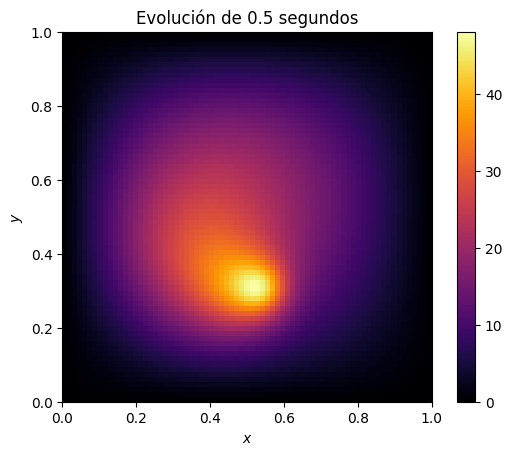

In [105]:
# Constantes
boxSize = 1
timeStep = 1e-5
diffusivity = 5
temperatureAtSides = 10

# Tamaño de la rejilla para asegurar estabilidad
gridSizeModifier = 0.01                     # aumenta el tamaño ligeramente si se desea para asegurar estabilidad en la conversión a `int`
gridSize = ( 4*diffusivity*timeStep )**0.5 + gridSizeModifier*( 4*diffusivity*timeStep )**0.5   # cálculo basado en la condición de estabilidad de la ecuación
gridResolution = int(boxSize / gridSize)    # calculamos la cantidad de puntos que implica el tamaño de la rejilla
gridSize = boxSize / gridResolution         # volvemos a calcular el tamaño de la rejilla para que se ajuste correctamente a la resolución

# Inicializamos la rejilla de valores de temperatura
temperatureGrid = zeros([gridResolution+3, gridResolution+3], float)

# Fuente de calor
x = linspace(0, boxSize, gridResolution+3)
y = linspace(0, boxSize, gridResolution+3)
x, y = meshgrid(x, y)
angularVelocity = 500
radius = 0.2

def xCos(time: float, radius: float, angularVelocity: float):
    x0 = radius * cos(angularVelocity * time) + 0.5
    return x0

def ySin(time: float, radius: float, angularVelocity: float):
    y0 = radius * sin(angularVelocity * time) + 0.5
    return y0

# Loop principal
timeMax = 0.5
time = 0
while time < timeMax:
    # Cálculo de la fuente de calor para el instante
    x0 = xCos(time, radius, angularVelocity)
    y0 = ySin(time, radius, angularVelocity)
    heat = heatSource(x, y, x0, y0)

    # Evolución del calor
    term1 = temperatureGrid[2:gridResolution+3, 1:gridResolution+2] - 2*temperatureGrid[1:gridResolution+2, 1:gridResolution+2] + temperatureGrid[0:gridResolution+1, 1:gridResolution+2]
    term2 = temperatureGrid[1:gridResolution+2, 2:gridResolution+3] - 2*temperatureGrid[1:gridResolution+2, 1:gridResolution+2] + temperatureGrid[1:gridResolution+2, 0:gridResolution+1]
    evolutionTerm = timeStep * diffusivity * (term1 + term2) / gridSize**2
    heatTerm = timeStep * heat[1:gridResolution+2, 1:gridResolution+2]
    temperatureGrid[1:gridResolution+2, 1:gridResolution+2] = temperatureGrid[1:gridResolution+2, 1:gridResolution+2] + heatTerm + evolutionTerm
    
    time += timeStep
    print(f"tiempo: {round(time,4)}/{timeMax} {' '*20}", end='\r')

# Representación
imshow(temperatureGrid, extent=[0,boxSize, 0,boxSize], cmap='inferno', origin='lower')
colorbar()
xlabel('$x$')
ylabel('$y$')
title(f'Evolución de {timeMax} segundos')
show()

## Condiciones de contorno periódicas:

- Suponer ahora condiciones de contorno periódicas en ambas direcciones y resolver el problema cuando la fuente se mueve describiendo una hélice alrededor del toro.**NOTA** Gracias a la función módulo `%` es sencillo definir condiciones de contorno periódicas. Además, describir un movimiento helicoidal sobre un toro es equivalente a una trayectoria rectilinea en el plano con condiciones de contorno periódicas.